In [1]:
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (24,5)
import seaborn as sns
sns.set()
sns.set(font_scale=1.75)
import scipy

In [4]:
cols = ["test", "map"]  + [50000,    100000,   150000,   200000,   250000,   300000,   350000,   400000,   500000,  600000,  700000,
       800000,   900000,   1000000, 2000000, 3000000, 4000000, 5000000, 10000000, 20000000]
data = pd.read_csv("results.csv", header=None)
data.columns = cols[:len(data.columns)]
tests = data["test"].unique()
maps = data["map"].unique()
data_dict = dict()
for t in tests:
    for m in maps:
        data_dict[(t,m)] = data[(data["map"] == m) & (data["test"] == t)]     
for k,v in data_dict.items():
    # keep only the ones that are within +3 to -3 standard deviations
    data_dict[k] = v[np.abs(v - v.mean()) <= (3*v.std())].drop(["test", "map"], axis=1)


<ipython-input-4-f10c0c83917b>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_dict[k] = v[np.abs(v - v.mean()) <= (3*v.std())].drop(["test", "map"], axis=1)
<ipython-input-4-f10c0c83917b>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_dict[k] = v[np.abs(v - v.mean()) <= (3*v.std())].drop(["test", "map"], axis=1)
<ipython-input-4-f10c0c83917b>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data_dict[k] = v[np.abs(v - v.mean()) <= (3*v.std())].drop(["test",

In [3]:
data.describe()

,50000,100000,150000,200000,250000,300000,350000,400000,500000,600000,700000,800000,900000,1000000,2000000
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.00000,240.000000,240.000000,240.000000,240.000000
mean,140.316667,191.045833,216.091667,240.575000,271.620833,167.683333,320.300000,172.133333,178.775000,454.220833,182.25000,183.350000,600.404167,190.325000,204.800000
std,138.754983,209.783755,308.330421,389.845601,502.027265,101.983958,692.974646,106.379516,109.707978,1248.623974,113.08058,113.038606,1872.050309,118.406057,126.910907
min,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000
25%,51.000000,91.250000,83.000000,87.750000,92.000000,95.000000,97.500000,97.750000,100.000000,103.750000,104.00000,106.750000,107.750000,108.750000,109.000000
50%,122.000000,161.000000,165.500000,166.000000,172.500000,172.000000,172.000000,164.500000,184.500000,172.000000,177.50000,183.000000,185.000000,187.500000,199.500000
75%,182.000000,194.500000,203.500000,217.500000,235.000000,228.750000,235.500000,224.000000,243.000000,248.000000,250.00000,249.000000,249.250000,258.250000,282.000000
max,946.000000,1208.000000,1802.000000,2303.000000,2836.000000,400.000000,3791.000000,417.000000,418.000000,6673.000000,471.00000,429.000000,10177.000000,542.000000,494.000000


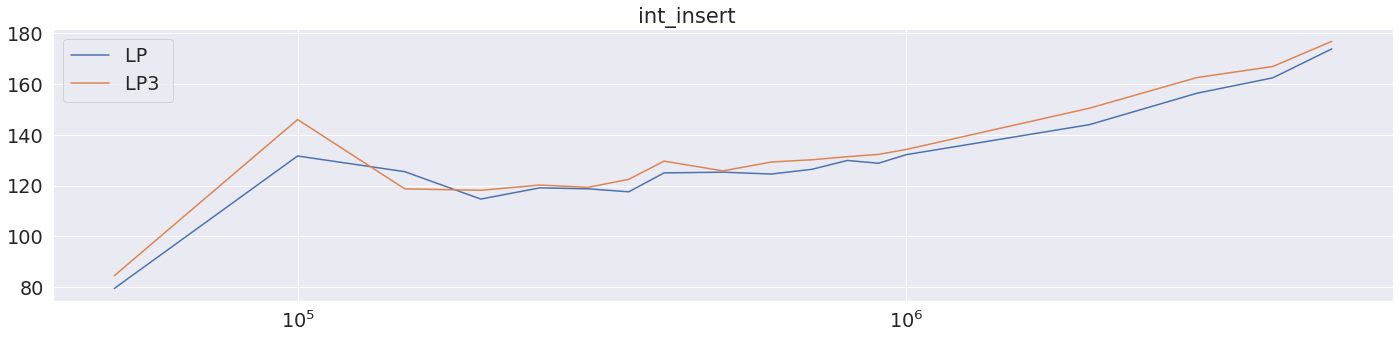

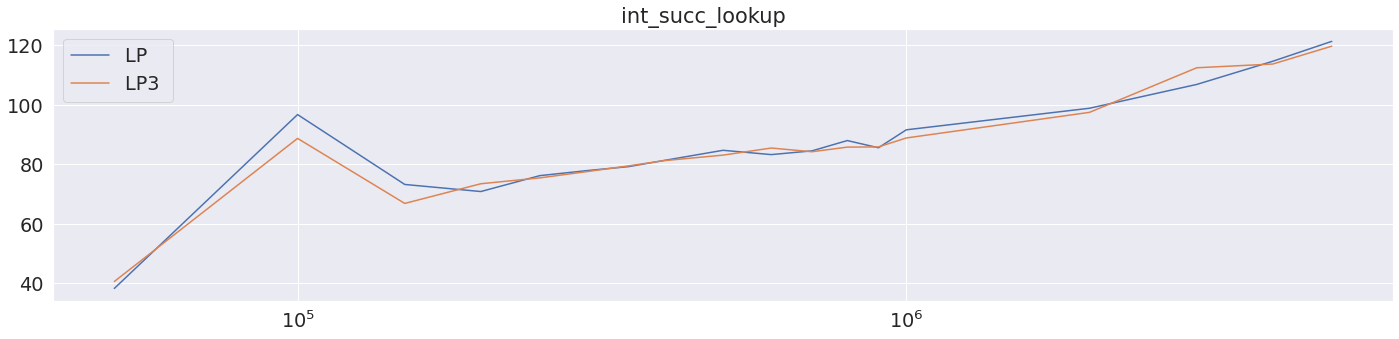

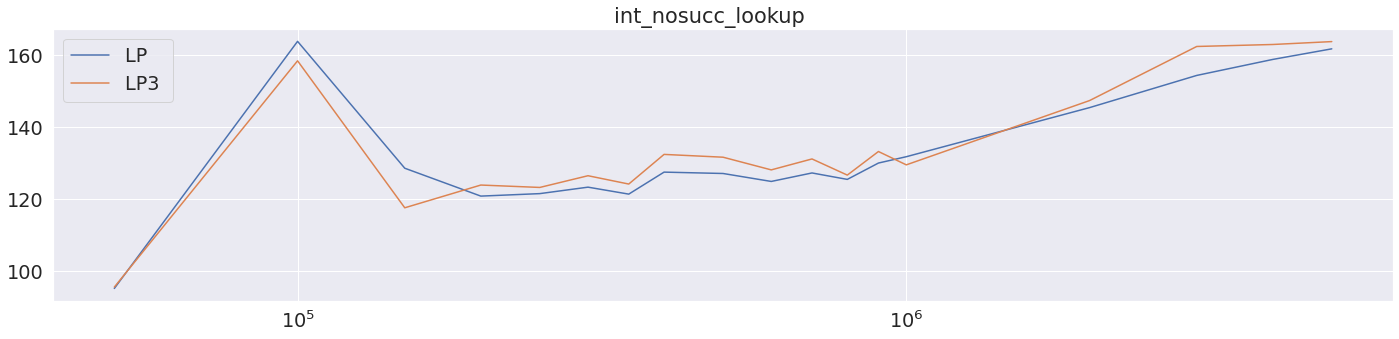

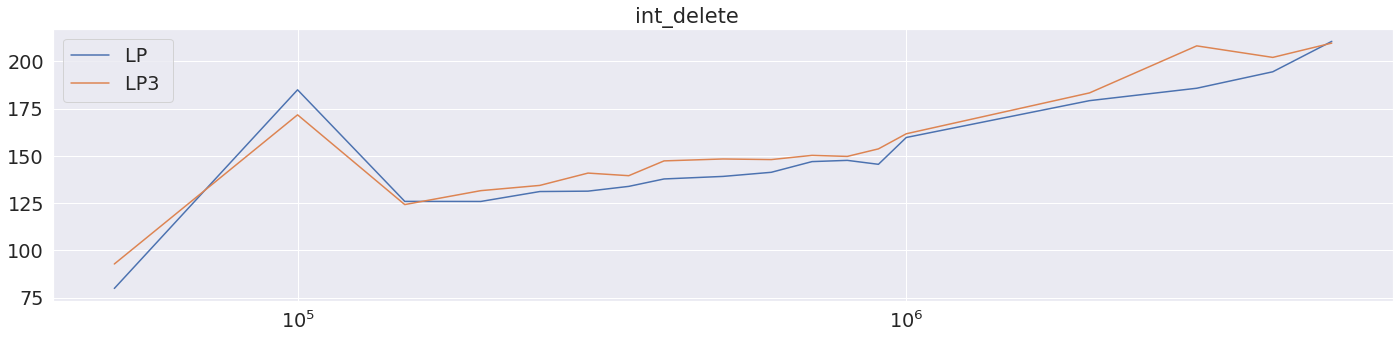

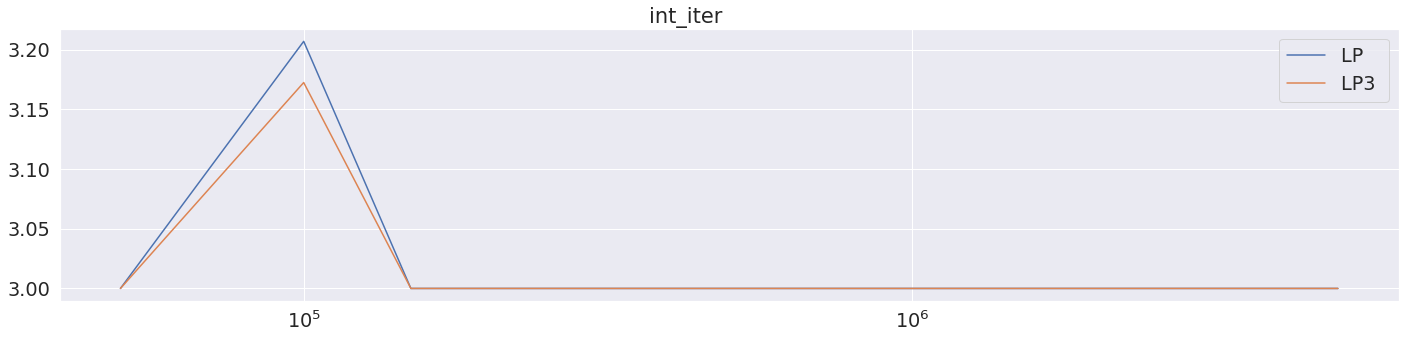

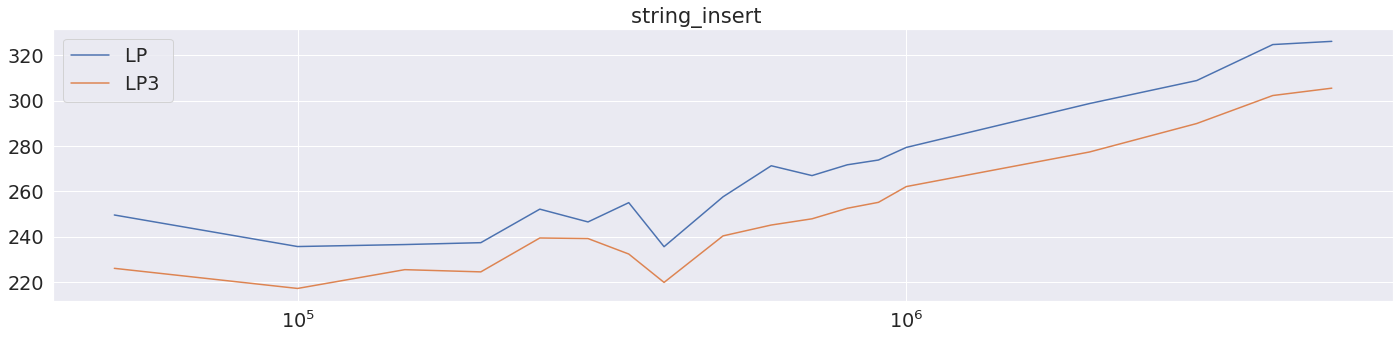

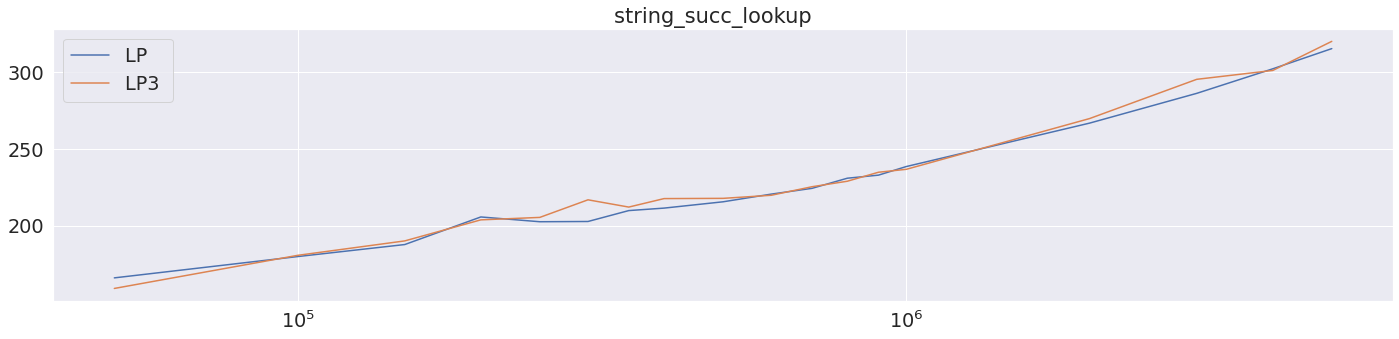

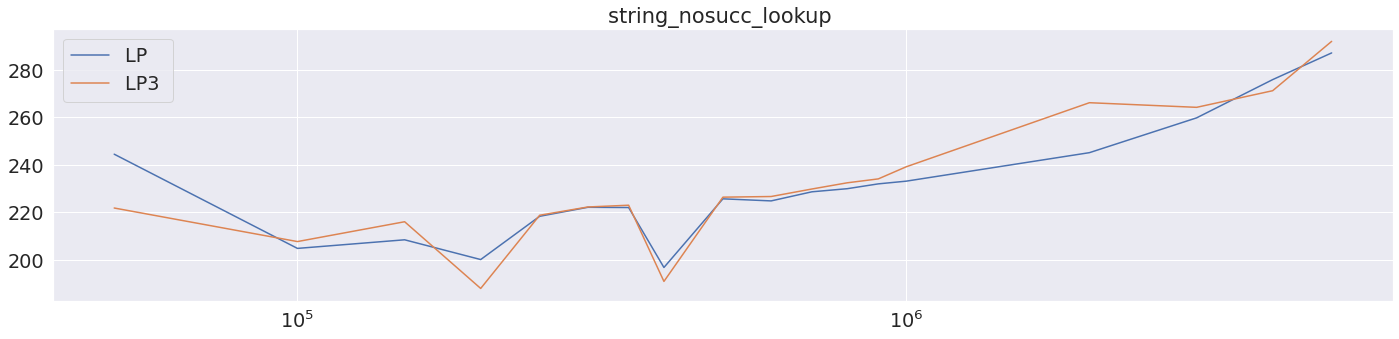

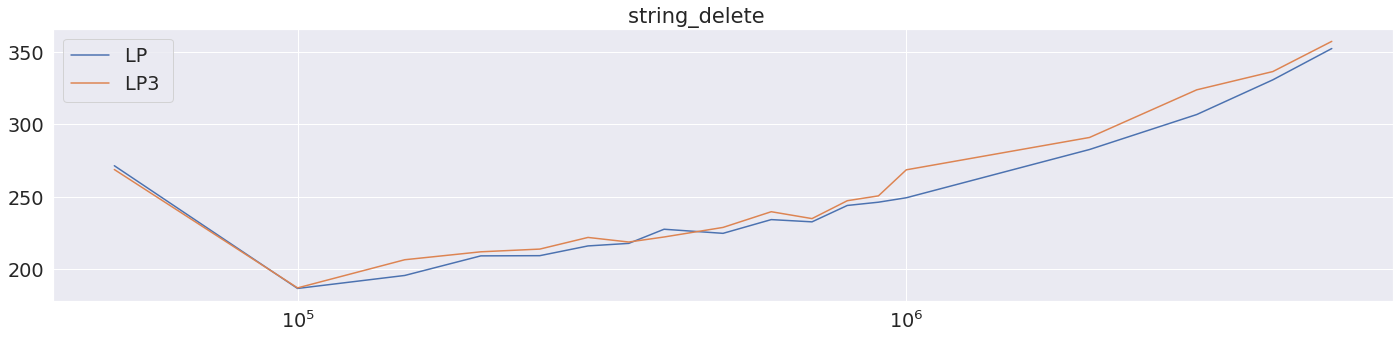

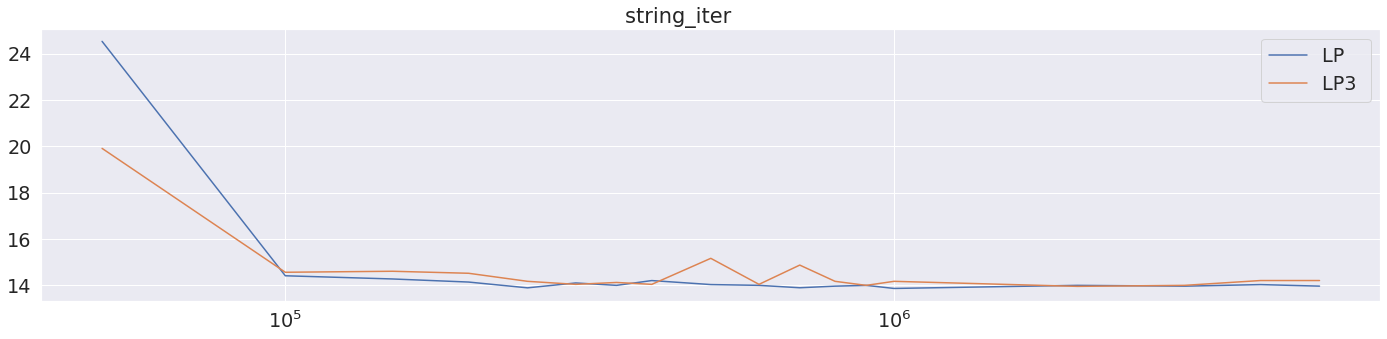

In [5]:
def gen_graph(test):
    badtest= ["int_insert", "string_insert"]
    for m in maps:
        if "std::unordered_map" in m or "LP2" in m:
            continue
        if "LP2" in m and "iter" in test:
            continue
        mdata = data_dict[(test,m)].mean()
        sns.lineplot(x=mdata.index, y=mdata, label=m)
    plt.title(test)
    plt.xscale("log")
    plt.show()
    
# print(maps)
for i in tests:
    gen_graph(i)

# This is the same as above, but i compiled with gcc instead to see if the speeds differed if i used a different compiler
